https://www.kaggle.com/rickymos/basic-machine-learning-with-cancer

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns # used for plot interactive graph
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
# from sklearn.cross_validation import KFold # use for cross validation #deprecated
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 


In [26]:
# Separate mean, std, worst columns
features_mean = df.loc[:, df.columns.str.contains('_mean')]
features_se = df.loc[:, df.columns.str.contains('_se')]
features_worst = df.loc[:, df.columns.str.contains('_worst')]

# print(list(features_mean))
# print(len(features_mean.columns))
# print('-' * 100)
# print(list(features_se))
# print(len(features_se.columns))
# print('-' * 100)
# print(list(features_worst))
# print(len(features_worst.columns))


In [ ]:
# to do
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

/Users/jessie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


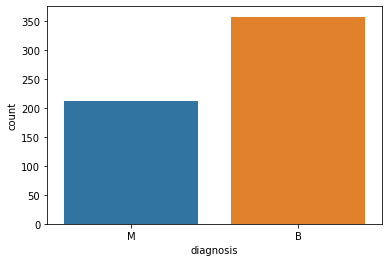

In [35]:
# maglinant vs benign cases
sns.countplot(df['diagnosis'],label="Count");

In [74]:
features_mean[['radius_mean', 'perimeter_mean', 'area_mean']]

,radius_mean,perimeter_mean,area_mean
0,17.99,122.80,1001.0
1,20.57,132.90,1326.0
2,19.69,130.00,1203.0
3,11.42,77.58,386.1
4,20.29,135.10,1297.0
...,...,...,...
564,21.56,142.00,1479.0
565,20.13,131.20,1261.0
566,16.60,108.30,858.1
567,20.60,140.10,1265.0


In [79]:
X = features_mean
y = df.diagnosis 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [ ]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

In [ ]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [ ]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [ ]:
model.fit(train_X,train_y)# now fit our model for traiing data

In [ ]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [ ]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

* Here the Accuracy for our model is 91 % which seems good*

In [ ]:
# lets now try with SVM

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

**SVM is giving only 0.85 which we can improve by using different techniques** 
**i will improve it till then beginners can understand how to model a data and they can have a overview of ML**

*Now lets do this for all feature_mean so that from Random forest we can get the feature which are important**

In [ ]:
prediction_var = features_mean # taking all features

In [ ]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [ ]:
model=RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

 - by taking all features accuracy increased but not so much so according to Razor's rule simpler method is better
 - by the way now lets check the importan features in the prediction

In [ ]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

In [ ]:
# first lets do with SVM also using all features

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
# as you can see the accuracy of SVM decrease very much
# now lets take only top 5 important features given by RandomForest classifier

In [ ]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      

In [ ]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

In [ ]:
prediction_var = features_worst

In [ ]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
# but same problem With SVM, very much less accuray I think we have to tune its parameter
# that i will do later in intermidate part
#now we can get the important features from random forest now run Random Forest for it 

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
# the accuracy for RandomForest invcrease it means the value are more catogrical in Worst part
#lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

In [ ]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 5 important features

In [ ]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [ ]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

In [ ]:
# now I think for simplicity the Randomforest will be better for prediction

In [ ]:
# Now explore a little bit more
# now from features_mean i will try to find the variable which can be use for classify
# so lets plot a scatter plot for identify those variable who have a separable boundary between two class
#of cancer

In [ ]:
# Lets start with the data analysis for features_mean
# Just try to understand which features can be used for prediction
# I will plot scatter plot for the all features_mean for both of diagnosis Category
# and from it we will find which are easily can used for differenciate between two category

In [ ]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

** Observation**

** 1. Radius, area and perimeter have a strong linear relationship as expected
     2 As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can t be used for classify two category because both category are mixed there is no separable plane
3. So we can remove them from our prediction_var**

In [ ]:
# So predicton features will be 
features_mean

In [ ]:
# So predicton features will be 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [ ]:
# Now with these variable we will try to explore a liitle bit we will move to how to use cross validiation
# for a detail on cross validation use this link https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

In [ ]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds
    

In [ ]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [ ]:
# so those features who are capable of classify classe will be more useful

In [ ]:
# so in this part i am going to explain about only some concept of machine learnig 
# here I will also compare the accuracy of different models
# I will First use cross validation with different model
# then I will explain about how to to tune the parameter of models using gridSearchCV 

In [ ]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    
    

In [ ]:
# Now from Here start using different model

In [ ]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

**observation

 1. Accuracy is 100 % means over fitting 
 2. but cross validation scores are not good
 3 so accuracy cant be considered only factor here

In [ ]:
# now move to svm

In [ ]:
model = svm.SVC()

classification_model(model,data,prediction_var,outcome_var)

In [ ]:
# I am facing problem with SVM dont know why?
#lets leave that we will try to do it later 

In [ ]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
# same here cross validation scores are not good
# now move to RandomForestclassifier
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

In [ ]:
# cross validation score are also not bed
# so Random forest is good
# lets try with logistic regression
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

** It was a detailed comparison of machine learning models 

 1. In next segment I will try to  explain the tuning of parameter for different models
 2. Then using those parameter we will try to forecast**

** Tuning Parameters  using grid search CV**

 *Lets Start with decision tree classifier
Tuning the parameters means using the best parameter for predict 
 there are many parameters need to model a Machine learning Algorithm
 for decision tree classifier refer this link [Link](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)*

In [ ]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [ ]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)
    
    
    
    

In [ ]:
# Here we have to take parameters that are used for Decison tree Classifier
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)
# call our function

*observation*

 1. the score increase to 95 % 
 2. Seems to be good
 3. Lets do with KNN
 4. link for KNN  [Link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 5. if you are a beginner please follow the link it will be very much useful

In [ ]:
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

 1. Try with SVM
 2. [link](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

*observation*

 1. The SVM is working fine with good parameter it shows us what is the use of running of parameters
 2. In the first by using default  I was getting only 70 % accuracy
 3. But with tuned parameter it is 95 %

 1. Same we can do for Random Forest classifier
 2. I will not do that 
 3. if someone is using this as reference please do for Random Forest Classifier also

 1. The main objective of this notebook is to provide a hang on the the Machine learning methods
 2. I think it will be very useful for beginner because in this I have provided every thing that a beginner needs  most
 3. When I  was a beginner I face many problems finding these all so i tried to make everything available here 
 4. Thanks 